In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import OpenWeather_API_KEY
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [5]:
cities

['albany',
 'kahului',
 'baruun-urt',
 'faanui',
 'broome',
 'ponta do sol',
 'puerto ayora',
 'ushuaia',
 'taolanaro',
 'cape town',
 'yemelyanovo',
 'saldanha',
 'busselton',
 'iqaluit',
 'amderma',
 'nichinan',
 'sao miguel do araguaia',
 'chokurdakh',
 'lavrentiya',
 'hobart',
 'rikitea',
 'joigny',
 'bluff',
 'belushya guba',
 'kaitangata',
 'paiho',
 'hofn',
 'glenwood springs',
 'upernavik',
 'castro',
 'semirom',
 'panjab',
 'cherskiy',
 'mataura',
 'fayaoue',
 'pouebo',
 'tondela',
 'tabory',
 'punta arenas',
 'sentyabrskiy',
 'portlethen',
 'jalna',
 'san ignacio',
 'oktyabrskiy',
 'illoqqortoormiut',
 'cayenne',
 'carnarvon',
 'mao',
 'chuy',
 'ambon',
 'tsihombe',
 'agadez',
 'mecca',
 'san quintin',
 'katangli',
 'samarai',
 'clyde river',
 'aklavik',
 'kroya',
 'souillac',
 'san luis',
 'hermanus',
 'talcahuano',
 'paracuru',
 'chumikan',
 'akureyri',
 'blagoyevo',
 'kawasaki',
 'bengkulu',
 'mashhad',
 'butaritari',
 'deh rawud',
 'huanta',
 'mahebourg',
 'maragogi',
 'm

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | baruun-urt
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | yemelyanovo
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | nichinan
Processing Record 17 of Set 1 | sao miguel do araguaia
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | rikitea
Processing 

Processing Record 37 of Set 4 | qaqortoq
Processing Record 38 of Set 4 | hounde
Processing Record 39 of Set 4 | unai
Processing Record 40 of Set 4 | businga
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | okhotsk
Processing Record 43 of Set 4 | pontianak
Processing Record 44 of Set 4 | manyana
Processing Record 45 of Set 4 | sao miguel
Processing Record 46 of Set 4 | leua
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | muros
Processing Record 49 of Set 4 | kitami
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | duz
City not found. Skipping...
Processing Record 2 of Set 5 | haimen
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | conde
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | provideniya
Processing Record 7 of Set 5 | severobaykalsk
Processing Record 8 of Set 5 | vaini
Processing Record 9 of Set 5 | belmopan
Processing Record 10 of Set 5 | padang
Processing Record 1

Processing Record 27 of Set 8 | navrongo
Processing Record 28 of Set 8 | neryungri
Processing Record 29 of Set 8 | letlhakane
Processing Record 30 of Set 8 | kushima
Processing Record 31 of Set 8 | rae bareli
Processing Record 32 of Set 8 | gurgan
City not found. Skipping...
Processing Record 33 of Set 8 | ancona
Processing Record 34 of Set 8 | merauke
Processing Record 35 of Set 8 | karaul
City not found. Skipping...
Processing Record 36 of Set 8 | antsohihy
Processing Record 37 of Set 8 | assiniboia
Processing Record 38 of Set 8 | annonay
Processing Record 39 of Set 8 | georgetown
Processing Record 40 of Set 8 | janauba
Processing Record 41 of Set 8 | yashkul
Processing Record 42 of Set 8 | khuzhir
Processing Record 43 of Set 8 | rungata
City not found. Skipping...
Processing Record 44 of Set 8 | namibe
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | high prairie
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | koubia
Process

Processing Record 17 of Set 12 | banda aceh
Processing Record 18 of Set 12 | cidreira
Processing Record 19 of Set 12 | okato
Processing Record 20 of Set 12 | rockland
Processing Record 21 of Set 12 | birao
Processing Record 22 of Set 12 | verkhnevilyuysk
Processing Record 23 of Set 12 | sistranda
Processing Record 24 of Set 12 | tucurui
Processing Record 25 of Set 12 | raychikhinsk
Processing Record 26 of Set 12 | nogliki
Processing Record 27 of Set 12 | kuito
Processing Record 28 of Set 12 | tombouctou
Processing Record 29 of Set 12 | matagami
Processing Record 30 of Set 12 | ust-nera
Processing Record 31 of Set 12 | klaksvik
Processing Record 32 of Set 12 | surab
Processing Record 33 of Set 12 | borogontsy
Processing Record 34 of Set 12 | atasu
Processing Record 35 of Set 12 | pierre
Processing Record 36 of Set 12 | catamarca
Processing Record 37 of Set 12 | coahuayana
Processing Record 38 of Set 12 | tautira
Processing Record 39 of Set 12 | bad doberan
Processing Record 40 of Set 12

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,34.29,37,100,8.10,US,2022-03-13 21:43:34
1,Kahului,20.8947,-156.4700,86.02,45,20,20.71,US,2022-03-13 21:41:18
2,Baruun-Urt,46.6806,113.2792,18.70,89,37,5.73,MN,2022-03-13 21:43:35
3,Faanui,-16.4833,-151.7500,81.28,72,93,8.97,PF,2022-03-13 21:43:35
4,Broome,42.2506,-75.8330,29.46,55,100,16.11,US,2022-03-13 21:38:40
5,Ponta Do Sol,32.6667,-17.1000,62.06,60,31,22.30,PT,2022-03-13 21:43:36
6,Puerto Ayora,-0.7393,-90.3518,87.76,89,48,3.00,EC,2022-03-13 21:43:36
7,Ushuaia,-54.8000,-68.3000,42.46,81,100,24.16,AR,2022-03-13 21:40:50
8,Cape Town,-33.9258,18.4232,61.21,59,40,11.50,ZA,2022-03-13 21:43:36
9,Yemelyanovo,56.1681,92.6767,-12.19,77,0,2.24,RU,2022-03-13 21:43:37


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

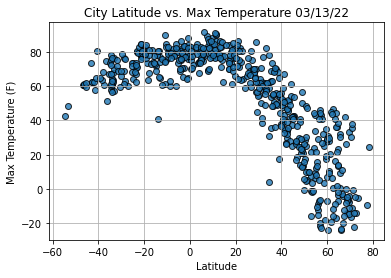

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/latitude_vs_max_temp.png")

# Show plot.
plt.show()

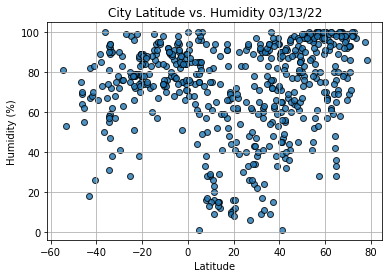

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_humidity.png")
# Show plot.
plt.show()

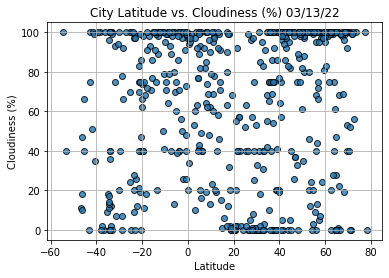

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_cloudiness.png")
# Show plot.
plt.show()

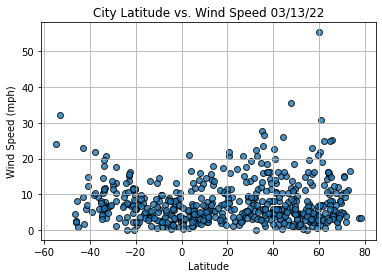

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/latitude_vs_wind_speed.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                     Nichinan
Country                        JP
Date          2022-03-13 21:43:38
Lat                          31.6
Lng                      131.3667
Max Temp                    62.28
Humidity                       91
Cloudiness                     18
Wind Speed                    5.3
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-03-13 21:43:34,42.6001,-73.9662,34.29,37,100,8.10
1,Kahului,US,2022-03-13 21:41:18,20.8947,-156.4700,86.02,45,20,20.71
2,Baruun-Urt,MN,2022-03-13 21:43:35,46.6806,113.2792,18.70,89,37,5.73
4,Broome,US,2022-03-13 21:38:40,42.2506,-75.8330,29.46,55,100,16.11
5,Ponta Do Sol,PT,2022-03-13 21:43:36,32.6667,-17.1000,62.06,60,31,22.30


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

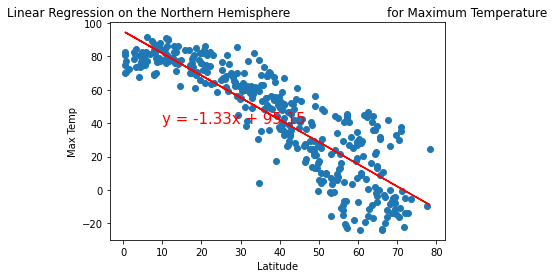

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

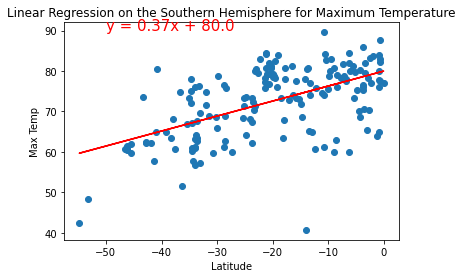

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

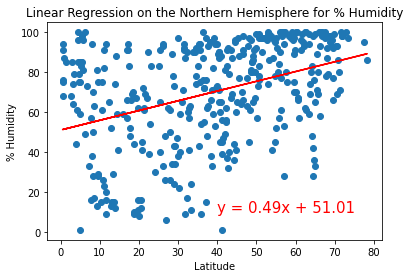

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

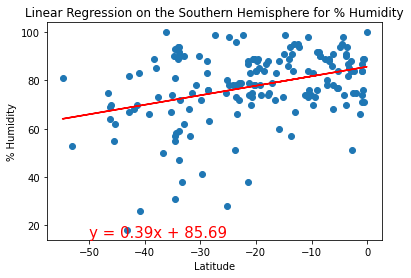

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

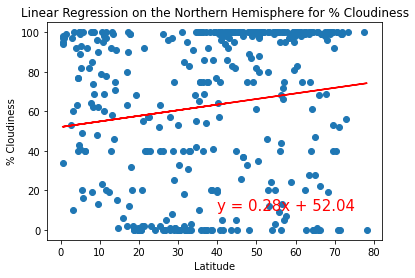

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

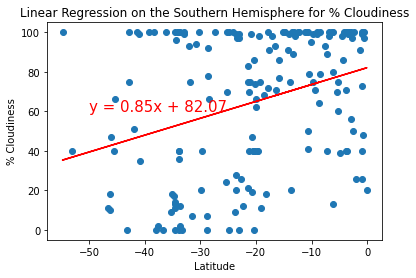

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

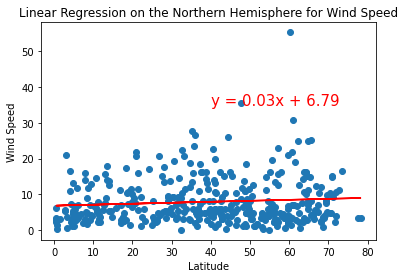

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

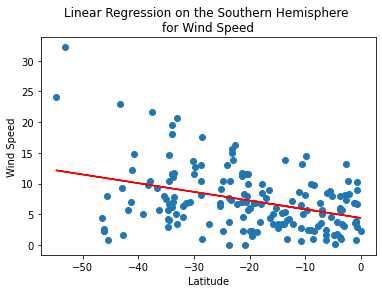

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))